# **Generative AI - NLP Project: Support Ticket Categorization**

## **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


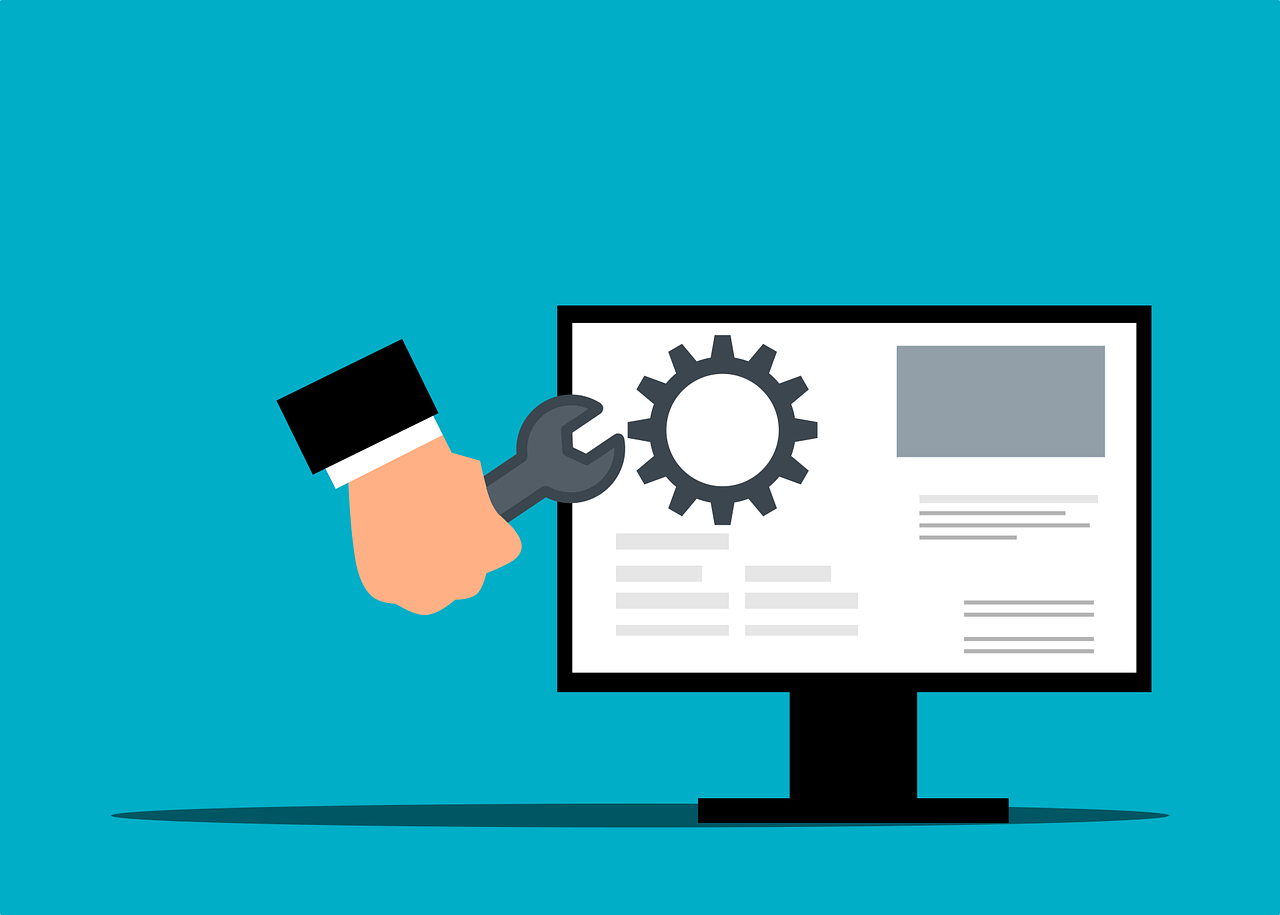

## **Project Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


## **Expected Output**

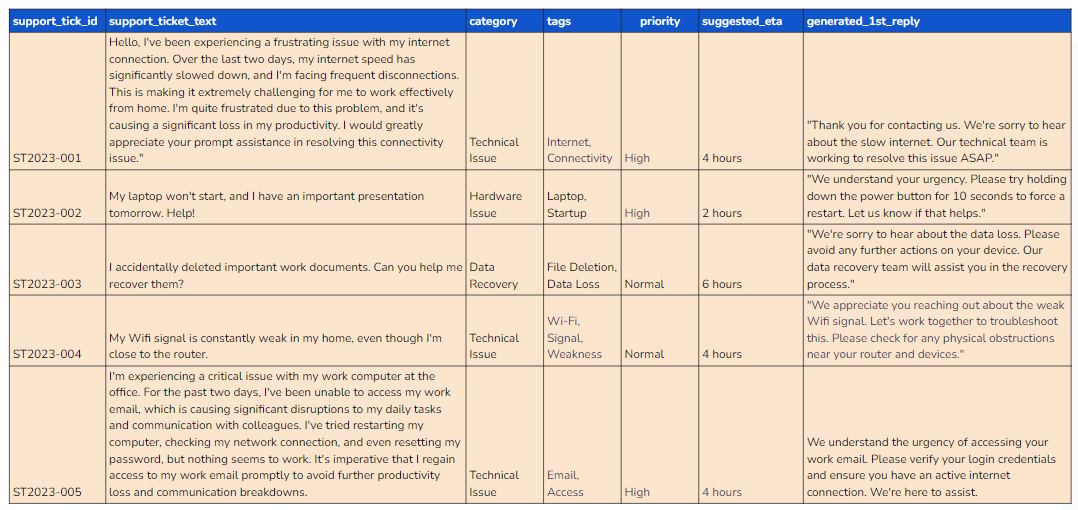

## **Model Loading**

In [4]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 123.4 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-0l3p4_r4
  Entered build tracker: /tmp/pip-build-tracker-0l3p4_r4
  Created temporary directory: /tmp/pip-install-zc90djaf
  Created temporary directory: /tmp/pip-ephem-wheel-cache-uk3kx18s
  1 location(s) to search for versions of scikit-build-core:
  * https://pypi.org/simple/scikit-build-core/
  Fetching project page and analyzing links: https://pypi.org/simple/scikit-build-core/
  Getting page https://pypi.org/simple/scikit-build-core/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/scikit-build-core/" in the cache
  Request header has "max_age" as 0, cache bypasse

In [5]:
# Install the hugging face hub
!pip install huggingface_hub -q

In [6]:
# installing nvidia-cuda-toolkit library #
!apt-get update
!apt-get install -y nvidia-cuda-toolkit

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,563 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,840 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu j

### **Write Python code that imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library.**

In [7]:
# Import the 'hf_hub_download' function from the 'huggingface_hub' library
from huggingface_hub import hf_hub_download


# Import the 'Llama' class from the 'llama_cpp' library
from llama_cpp import Llama

In [8]:
# Define the model name or path as a string (You can find this info from hugging face website)

#model_name_or_path = "TheBloke/Llama-2-7B-chat-GGUF"
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# Define the model basename as a string, indicating it's in the gguf format

#model_basename = "llama-2-7b-chat.Q4_K_M.gguf"      # the model is in gguf format
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"      # the model is in gguf format

In [9]:
# Download the model from the Hugging Face Hub using the 'hf_hub_download' function
# by specifying the 'repo_id' and 'filename'

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [10]:
# EXTRA #
print(model_path)

/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf


In [11]:
# Create an instance of the 'Llama' class with specified parameters
# remove the blank spaces and complete the code

lcpp_llm = Llama(
        model_path=model_path,
        n_threads=4,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=-1,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### **Define the System Message**

Write a Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, you should perform the following tasks:

Define a system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.



**What content and instructions should be included in the system message to guide the technical assistant when processing support tickets? The detailed description of the information and guidelines that the system message should contain is mentioned below :**






Here's a detailed breakdown of what should be included:

- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.
  - **Generating 1st Reply (Sentiment-Based):** Emphasize the importance of crafting a response that aligns with the sentiment expressed in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before responding.
  - **Tone:** Emphasize that the tone of all responses should be polite and professional.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

##### **The output of the model should be in JSON format**

In [12]:
def generate_llama_response(support_ticket_text):

    # Define system message
    system_message = """
    [INST]<<SYS>>Guide for Processing Support Tickets:

    Introduction:
    As a technical assistant, your role is to process support tickets efficiently and accurately.

    Ticket Categorization:
    Your primary task is to classify the support ticket into one of the following categories:
    - Technical Issue
    - Hardware Issue
    - Data Recovery

    Response Options:
    Please respond with only one of the predefined categories. Other responses are not acceptable.

    Sub-Tasks:
    Once you've identified the category, perform the following sub-tasks:
    - Creating Tags: Use relevant tags to further classify the ticket.
    - Assigning Priority: Based on your understanding, assign a priority level (e.g., "High" or "Normal").
    - Suggesting Estimated Time of Arrival (ETA): Provide an estimated time for resolving the issue mentioned in the ticket.
    - Generating 1st Reply (Sentiment-Based): Craft a response that aligns with the sentiment expressed in the ticket.

    General Instructions:
    - Categorization: Only categorize the ticket into the predefined categories.
    - Reading Carefully: Read the support ticket text thoroughly and consider the overall sentiment before responding.
    - Tone: Ensure that all responses maintain a polite and professional tone.
    - Remove "Sure, I'd be happy to help! Here is the output for the support ticket you provided:" from your response.
    - The output of your responses should be in JSON format only without any addditional plain text.
    - Please ensure that the response is in valid JSON format and no english text is added before and after the JSON response.
    - restrict your response to less than 256 words/tokens at any cost .
    - if a question is asked in the input text, answer it with data available in given text only, and don't ask further questions.

    Output Format:
    {
       "category": " ",
       "tags": [" ", " ", " "],
       "priority": " ",
       "suggested_eta": " ",
       "generated_1st_reply": " "
     }

    <</SYS>>[/INST]
    """
    import re

    # Combine support_ticket_text and system_message to create prompt string
    prompt = f"{support_ticket_text}\n{system_message}"

    while True:
      #######################################################
            # Generate response from LLaMA model
            response = lcpp_llm(
                  prompt=prompt,
                  max_tokens=512,
                  temperature=0,
                  top_p=0.95,
                  repeat_penalty=1.2,
                  top_k=50,
                  stop=['INST'],
                  echo=False
            )
            #print(response)

            # Extract and return response text from generated response
            response_text = response['choices'][0]['text'].strip()
            #print(response_text)

            # Regular expression pattern to match JSON data
            json_pattern = r'{[^{}]*}'

            # Find JSON data using regular expression
            json_data_match = re.search(json_pattern, response_text)

            if json_data_match:
                # Extract the JSON data from the matched pattern
                json_data = json_data_match.group()
                print(json_data)
                print("\n")
                return json_data
                break
            else:
                print(" No JSON data found in the response text. Going in while loop again \n")


       ########################################################



### **Loading our Dataset**

In [1]:
# Import the pandas library and alias it as 'pd'

import pandas as pd

# Read a CSV file into a DataFrame and store it in the 'data' variable
data= pd.read_csv('Support_ticket_text_data1.csv')



"""
try:
    data = pd.read_csv("Support_ticket_text_data.csv", encoding="utf-8", dtype=str, on_bad_lines="skip")
    print(data.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

"""


'\ntry: \n    data = pd.read_csv("Support_ticket_text_data.csv", encoding="utf-8", dtype=str, on_bad_lines="skip")\n    print(data.head())\nexcept Exception as e:\n    print(f"Error reading the CSV file: {e}")\n\n'

- After reading the CSV file into the 'data' DataFrame, how can you determine the shape of the DataFrame, and what information does 'data.shape' provide?
- What does 'data.head()' do, and how can it be used to inspect the contents of the DataFrame?

In [13]:
# Determining the shape of the DataFrame
shape = data.shape

# Printing the shape of the DataFrame
print("Shape of the DataFrame:", shape)

Shape of the DataFrame: (21, 2)


The data.shape attribute returns a tuple representing the dimensions of the DataFrame.
Specifically, it returns the number of rows and columns in the DataFrame, in that order. So the given data has 21 rows and 2 columns.

In [14]:
# Inspecting the first 5 rows of the DataFrame
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


The data.head() method is used to inspect the first few rows of a DataFrame. By default, it returns the first 5 rows of the DataFrame, but you can specify the number of rows to display by passing an integer argument to the method.

### **Create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame**

In [15]:
# Apply a function to each element in the 'support_ticket_text' column of the DataFrame 'data'
# The applied function, in this case, is a lambda function.

# The lambda function takes a single argument 'x', representing each individual 'support_ticket_text' in the column.

# Inside the lambda function:
# - 'generate_llama_response(x)' is called to generate a response based on the 'support_ticket_text'.
# - The result of 'generate_llama_response(x)' is assigned to a new column called 'llama_response' in the DataFrame 'data'.

# Example - data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))

data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))




{
"category": "Technical Issue",
"tags": ["Internet Connection"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "We apologize for the inconvenience caused by your slow internet connection. Our technical team is working to resolve the issue as soon as possible."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Technical", "Hardware", "Urgent"],
"priority": "High",
"suggested_eta": "2-3 hours",
"generated_1st_reply": "I understand the urgency of your request and am here to assist you with resolving the technical issue. Please provide me with more details so I can better understand the problem and offer a solution as soon as possible."
}




Llama.generate: prefix-match hit


{
"category": "Data Recovery",
"tags": ["deleted files", "data loss"],
"priority": "High",
"suggested_eta": "24-48 hours",
"generated_1st_reply": "I apologize for the inconvenience caused by the data loss. We understand the importance of recovering your essential work documents. Our team will prioritize the data recovery process and guide you through it."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Wi-Fi", "signal strength"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "Thank you for reaching out to us. Based on the information provided, it appears that your Wi-Fi signal is weak in certain areas of your home. We recommend checking the placement and positioning of your router to ensure optimal coverage. Additionally, you may want to consider upgrading to a range extender or mesh network system to improve connectivity throughout your home."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["smartphone", "battery", "draining"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "Thank you for reaching out to us. Based on the information provided, it seems like your smartphone's battery is draining rapidly, even with minimal use. We recommend trying a hard reset and checking if any software updates are available for your device."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["password reset", "online banking"],
"priority": "High",
"suggested_eta": "1-2 business days",
"generated_1st_reply": "Thank you for reaching out to us. We apologize for any inconvenience this has caused and will assist you with resetting your password as soon as possible."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["software issue", "application error"],
"priority": "High",
"suggested_eta": "2 hours",
"generated_1st_reply": "Thank you for reaching out to us. We apologize for the inconvenience you're experiencing with your software. Our team is working on a solution and we estimate it will be resolved within 2 hours."
}




Llama.generate: prefix-match hit


{
"category": "Hardware Issue",
"tags": ["Computer Crashes", "Blue Screen of Death"],
"priority": "High",
"suggested_eta": "24-48 hours",
"generated_1st_reply": "Thank you for reaching out to us. Based on the information provided, it appears that your computer is experiencing a hardware issue causing frequent blue screens. We recommend running a diagnostic test to identify the root cause of the problem and provide a solution."
}




Llama.generate: prefix-match hit


{
"category": "Data Recovery",
"tags": ["External Hard Drive", "Not Recognized"],
"priority": "High",
"suggested_eta": "24-48 hours",
"generated_1st_reply": "I understand that your external hard drive is not being recognized by your computer. I'll assist you with recovering the vital data stored on it."
}




Llama.generate: prefix-match hit


 No JSON data found in the response text. Going in while loop again 



Llama.generate: prefix-match hit


{
"category": "Hardware Issue",
"tags": ["Graphics Card", "Gaming Laptop"],
"priority": "High",
"suggested_eta": "2-3 business days",
"generated_1st_reply": "Thank you for reaching out to us with your hardware issue. Based on the information provided, it appears that your graphics card may be malfunctioning and causing poor gaming performance. We recommend troubleshooting the following steps to potentially resolve the issue: [list of troubleshooting steps]. If these steps do not resolve the issue, we can assist you with further support or provide a replacement if necessary."
}




Llama.generate: prefix-match hit


{
"category": "Data Recovery",
"tags": ["USB Drive", "Critical Work Files"],
"priority": "High",
"suggested_eta": "24-48 hours",
"generated_1st_reply": "I understand that you have accidentally formatted your USB drive with critical work files. I can guide you through the data recovery process to retrieve these files."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Computer Hardware", "Screen Display"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "We apologize for the inconvenience, and we'll do our best to assist you with your technical issue. Can you please provide more details about the black screen display? Have you tried restarting your computer or checking the display settings?"
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Laptop", "Water Damage"],
"priority": "High",
"suggested_eta": "2-3 business days",
"generated_1st_reply": "We understand the urgency of the situation and will prioritize your ticket. We recommend that you do not attempt to turn on your laptop until further assistance is provided."
}




Llama.generate: prefix-match hit


 No JSON data found in the response text. Going in while loop again 



Llama.generate: prefix-match hit


{
"category": "Data Recovery",
"tags": ["USB Flash Drive", "Critical Files"],
"priority": "High",
"suggested_eta": "One to Two Business Days",
"generated_1st_reply": "Thank you for reaching out. We understand the urgency of recovering your critical files from the damaged USB flash drive. Our team will review the issue and provide a preliminary assessment within one to two business days."
}




Llama.generate: prefix-match hit


{
"category": "Hardware Issue",
"tags": ["Laptop", "Touchpad"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "We apologize for the inconvenience you're experiencing with your laptop's touchpad. We recommend troubleshooting the issue by checking the touchpad settings and updating the drivers to the latest version."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Internet Connection"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "We apologize for the inconvenience. We'll escalate your issue to our technical team and provide an update within 24 hours."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Wi-Fi", "connectivity"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "We apologize for the inconvenience you're experiencing with your Wi-Fi connection. Our team will prioritize this issue and aim to resolve it within 24 hours."
}




Llama.generate: prefix-match hit


{
"category": "Data Recovery",
"tags": ["USB Drive", "Formatted", "Crucial Files"],
"priority": "High",
"suggested_eta": "24-48 hours",
"generated_1st_reply": "I understand that you have accidentally formatted your USB drive with crucial files. I'll assist you with data recovery. Please provide the necessary information and details to proceed."
}




Llama.generate: prefix-match hit


{
"category": "Data Recovery",
"tags": ["External Hard Drive", "Not Recognized"],
"priority": "High",
"suggested_eta": "24-48 hours",
"generated_1st_reply": "I understand that your external hard drive is not being recognized, and you need assistance recovering vital data. I'll do my best to help you with this issue."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["Internet Connection"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "I apologize for the inconvenience, and I'm here to help. Based on your description, it seems like you are experiencing a technical issue with your internet connection. Our team will prioritize this issue and work towards resolving it as soon as possible."
}




Llama.generate: prefix-match hit


{
"category": "Technical Issue",
"tags": ["software behavior", "data loss"],
"priority": "High",
"suggested_eta": "24 hours",
"generated_1st_reply": "Thank you for bringing this issue to our attention. We will escalate the matter and work on resolving it as soon as possible."
}




In [16]:
## Check the new_column added
data.head(21)

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n""category"": ""Technical Issue"",\n""tags"": [""I..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n""category"": ""Technical Issue"",\n""tags"": [""T..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n""category"": ""Data Recovery"",\n""tags"": [""del..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n""category"": ""Technical Issue"",\n""tags"": [""W..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n""category"": ""Technical Issue"",\n""tags"": [""s..."
5,ST2023-011,I'm locked out of my online banking account an...,"{\n""category"": ""Technical Issue"",\n""tags"": [""p..."
6,ST2023-012,"My computer's performance is sluggish, severel...","{\n""category"": ""Technical Issue"",\n""tags"": [""s..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{\n""category"": ""Hardware Issue"",\n""tags"": [""Co..."
8,ST2023-014,My external hard drive isn't being recognized ...,"{\n""category"": ""Data Recovery"",\n""tags"": [""Ext..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{\n""category"": ""Hardware Issue"",\n""tags"": [""Gr..."


In [17]:
data['llama_response'][0]

'{\n"category": "Technical Issue",\n"tags": ["Internet Connection"],\n"priority": "High",\n"suggested_eta": "24 hours",\n"generated_1st_reply": "We apologize for the inconvenience caused by your slow internet connection. Our technical team is working to resolve the issue as soon as possible."\n}'

### **Prepare the dataset in the desired format**

In [18]:
import json

In [19]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Apply the function to the 'llama_response' column
data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)

In [20]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed
0,ST2023-006,My internet connection has significantly slowe...,"{\n""category"": ""Technical Issue"",\n""tags"": [""I...","{'category': 'Technical Issue', 'tags': ['Inte..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n""category"": ""Technical Issue"",\n""tags"": [""T...","{'category': 'Technical Issue', 'tags': ['Tech..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n""category"": ""Data Recovery"",\n""tags"": [""del...","{'category': 'Data Recovery', 'tags': ['delete..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n""category"": ""Technical Issue"",\n""tags"": [""W...","{'category': 'Technical Issue', 'tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n""category"": ""Technical Issue"",\n""tags"": [""s...","{'category': 'Technical Issue', 'tags': ['smar..."
5,ST2023-011,I'm locked out of my online banking account an...,"{\n""category"": ""Technical Issue"",\n""tags"": [""p...","{'category': 'Technical Issue', 'tags': ['pass..."
6,ST2023-012,"My computer's performance is sluggish, severel...","{\n""category"": ""Technical Issue"",\n""tags"": [""s...","{'category': 'Technical Issue', 'tags': ['soft..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{\n""category"": ""Hardware Issue"",\n""tags"": [""Co...","{'category': 'Hardware Issue', 'tags': ['Compu..."
8,ST2023-014,My external hard drive isn't being recognized ...,"{\n""category"": ""Data Recovery"",\n""tags"": [""Ext...","{'category': 'Data Recovery', 'tags': ['Extern..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{\n""category"": ""Hardware Issue"",\n""tags"": [""Gr...","{'category': 'Hardware Issue', 'tags': ['Graph..."


In [21]:
data['llama_response_parsed'][0]

{'category': 'Technical Issue',
 'tags': ['Internet Connection'],
 'priority': 'High',
 'suggested_eta': '24 hours',
 'generated_1st_reply': 'We apologize for the inconvenience caused by your slow internet connection. Our technical team is working to resolve the issue as soon as possible.'}

In [22]:
# Concatenate the original DataFrame 'data' with a new DataFrame created by normalizing JSON data.

# The 'data['llama_response_parsed']' column is assumed to contain JSON data that needs to be flattened and normalized.

# 'pd.json_normalize' is a pandas function used to normalize semi-structured JSON data into a flat DataFrame.
# In this case, it's applied to the 'llama_response_parsed' column, which presumably contains JSON data.

# The result of 'pd.json_normalize' is a DataFrame where the JSON data is flattened and each element becomes a separate column.

# The 'axis=1' parameter specifies that the concatenation should be done horizontally, i.e., the new columns from normalization
# will be added as new columns in the 'data' DataFrame.

# After this operation, the 'data' DataFrame will contain the original columns along with the additional columns
# generated by normalizing the JSON data from the 'llama_response_parsed


# example - data = pd.concat([data, pd.json_normalize(data['llama_response_parsed'])], axis=1)


data = pd.concat([data, pd.json_normalize(data['llama_response_parsed'])], axis=1)



In [23]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,"{\n""category"": ""Technical Issue"",\n""tags"": [""I...","{'category': 'Technical Issue', 'tags': ['Inte...",Technical Issue,[Internet Connection],High,24 hours,We apologize for the inconvenience caused by y...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n""category"": ""Technical Issue"",\n""tags"": [""T...","{'category': 'Technical Issue', 'tags': ['Tech...",Technical Issue,"[Technical, Hardware, Urgent]",High,2-3 hours,I understand the urgency of your request and a...
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n""category"": ""Data Recovery"",\n""tags"": [""del...","{'category': 'Data Recovery', 'tags': ['delete...",Data Recovery,"[deleted files, data loss]",High,24-48 hours,I apologize for the inconvenience caused by th...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n""category"": ""Technical Issue"",\n""tags"": [""W...","{'category': 'Technical Issue', 'tags': ['Wi-F...",Technical Issue,"[Wi-Fi, signal strength]",High,24 hours,Thank you for reaching out to us. Based on the...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n""category"": ""Technical Issue"",\n""tags"": [""s...","{'category': 'Technical Issue', 'tags': ['smar...",Technical Issue,"[smartphone, battery, draining]",High,24 hours,Thank you for reaching out to us. Based on the...
5,ST2023-011,I'm locked out of my online banking account an...,"{\n""category"": ""Technical Issue"",\n""tags"": [""p...","{'category': 'Technical Issue', 'tags': ['pass...",Technical Issue,"[password reset, online banking]",High,1-2 business days,Thank you for reaching out to us. We apologize...
6,ST2023-012,"My computer's performance is sluggish, severel...","{\n""category"": ""Technical Issue"",\n""tags"": [""s...","{'category': 'Technical Issue', 'tags': ['soft...",Technical Issue,"[software issue, application error]",High,2 hours,Thank you for reaching out to us. We apologize...
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{\n""category"": ""Hardware Issue"",\n""tags"": [""Co...","{'category': 'Hardware Issue', 'tags': ['Compu...",Hardware Issue,"[Computer Crashes, Blue Screen of Death]",High,24-48 hours,Thank you for reaching out to us. Based on the...
8,ST2023-014,My external hard drive isn't being recognized ...,"{\n""category"": ""Data Recovery"",\n""tags"": [""Ext...","{'category': 'Data Recovery', 'tags': ['Extern...",Data Recovery,"[External Hard Drive, Not Recognized]",High,24-48 hours,I understand that your external hard drive is ...
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{\n""category"": ""Hardware Issue"",\n""tags"": [""Gr...","{'category': 'Hardware Issue', 'tags': ['Graph...",Hardware Issue,"[Graphics Card, Gaming Laptop]",High,2-3 business days,Thank you for reaching out to us with your har...


In [24]:
# Drop specific columns which are not needed from the DataFrame 'data'
# Keep the columns which are mentioned in the sample output

data.drop(columns=['llama_response_parsed', 'llama_response'], inplace=True)


In [25]:
data.head(21)

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,Technical Issue,[Internet Connection],High,24 hours,We apologize for the inconvenience caused by y...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Technical Issue,"[Technical, Hardware, Urgent]",High,2-3 hours,I understand the urgency of your request and a...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[deleted files, data loss]",High,24-48 hours,I apologize for the inconvenience caused by th...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,"[Wi-Fi, signal strength]",High,24 hours,Thank you for reaching out to us. Based on the...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Technical Issue,"[smartphone, battery, draining]",High,24 hours,Thank you for reaching out to us. Based on the...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issue,"[password reset, online banking]",High,1-2 business days,Thank you for reaching out to us. We apologize...
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issue,"[software issue, application error]",High,2 hours,Thank you for reaching out to us. We apologize...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue,"[Computer Crashes, Blue Screen of Death]",High,24-48 hours,Thank you for reaching out to us. Based on the...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[External Hard Drive, Not Recognized]",High,24-48 hours,I understand that your external hard drive is ...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue,"[Graphics Card, Gaming Laptop]",High,2-3 business days,Thank you for reaching out to us with your har...


In [27]:
# exporting the output table in a csv file#
data.to_csv('Support_Ticket_Final_Output.csv', index=False)

## **Observations and insights from this exercise**

### **Observations and Insights:**

This project focused on developing an Automated Support Ticket Processing System using a Generative AI application powered by the LLAMA (Large Language Model) model. The objective was to streamline the classification and processing of support tickets by predicting categories, assigning priority levels, suggesting estimated resolution times, generating responses based on sentiment analysis, and storing the results in a structured format.


---


***There are following observations from this exercise:-***

---

**Consistency in Response Format:** The response function ensures consistency
in the format of responses generated by the LLAMA model. This consistency is crucial for maintaining clarity and readability across all support tickets processed by the system.

**Utilization of Structured Data:** By organizing the support ticket data into a structured format with categories, tags, priority, suggested ETA, and generated first replies, the system can effectively manage and prioritize tickets based on their urgency and nature.

**Handling of Unstructured Text:** The LLAMA model effectively processes unstructured text data from support tickets and generates coherent responses. This capability is valuable for automating the initial response process and reducing the workload on support staff.

**Customization of Output:** The response function allows for customization of the output format, ensuring that the generated responses adhere to a predefined structure. This customization enables integration with existing ticket management systems and facilitates seamless communication with users.

**Error Handling:** The function includes error handling mechanisms to handle cases where the response is not in JSON format. This robust error handling ensures that the system can gracefully handle unexpected scenarios and provide meaningful responses.

---


# **Recommendations for a business looking to adopt Automated Support Ticket Processing System solution:-**

---

**Define Clear Use Cases:** Before adopting a solution like this, businesses should clearly define the use cases and objectives for implementing automated support ticket processing. This includes identifying the types of tickets to be handled, expected response times, and desired outcomes.

**Data Preparation:** Ensure that the support ticket data is clean, consistent, and well-organized before feeding it into the system. This may involve preprocessing steps such as text normalization, removing noise, and standardizing data formats.

**Model Selection and Training**: Choose a language model that is well-suited for the specific requirements of the business. Consider factors such as model accuracy, performance, scalability, and compatibility with existing systems. Additionally, fine-tune the model if necessary to improve its accuracy for domain-specific tasks.

**Integration with Existing Systems:** Integrate the automated support ticket processing system with existing ticket management systems, customer relationship management (CRM) software, and communication channels. This integration ensures seamless operation and enables efficient workflow management.

**Continuous Monitoring and Improvement:** Regularly monitor the performance of the automated system and gather feedback from users to identify areas for improvement. Continuously refine the model, update response templates, and optimize workflows based on feedback and evolving business requirements.

**Data Security and Compliance:** Ensure that the automated support ticket processing system complies with data security regulations and privacy policies. Implement measures to protect sensitive customer data and adhere to industry best practices for data handling and storage.

**Staff Training and Support:** Provide training and support to staff members who interact with the automated system. Ensure that they understand how the system works, how to interpret its outputs, and how to escalate complex issues when necessary.

---

 #### **By following these recommendations, businesses can effectively leverage automated support ticket processing solutions to streamline their customer support operations, improve response times, and enhance overall customer satisfaction. Additionally, businesses can gain valuable insights from the data collected through the automated system, enabling them to make data-driven decisions and continuously optimize their support processes.**


---





---

